# Домашнее задание по лекции "Рекуррентные сети 2"


научить модель предсказывать y(i) по x(i)
пробовать RNN, LSTM, GRU

Задание 2 (дополнительное и необязательное)
применить LSTM для решения лекционного практического задания
colab.research.google.com...mRGTSSeICL

### импорт библиотек

In [ ]:
import torch
from torch import nn
import re
import random
import tqdm
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Задание 1

Сгенерировать последовательности, которые бы состояли из цифр (от 0 до 9)
и задавались следующим образом:
x - последовательность цифр
y1 = x1, y(i) = x(i) + x(1). Если y(i) >= 10, то y(i) = y(i) - 10

Задача:
научить модель предсказывать y(i) по x(i)
пробовать RNN, LSTM, GRU

### генерация и подготовка данных

In [ ]:
# создание последовательностей
X_1 = torch.randint(0,9,(1000,25)).numpy()
X_2 = torch.randint(0,9,(1000,75)).numpy()
X_3 = torch.randint(0,9,(1000,150)).numpy()

In [ ]:
# функция создания таргета
def target(X):
    Y = []
    Y_j = []
    for i, el in enumerate(X):
        for j, x in enumerate(el):
            if j == 0:
                x_1 = x
                Y_j.append(x_1)
            else:
                y = x_1 + x
                if y > 9:
                    Y_j.append(y - 10)
                else:
                    Y_j.append(y)
        Y.append(Y_j)
        Y_j = []
    return Y

In [ ]:
Y_1 = target(X_1)
Y_2 = target(X_2)
Y_3 = target(X_3)

X_1 = [[el for el in seq] for seq in X_1]
X_2 = [[el for el in seq] for seq in X_2]
X_3 = [[el for el in seq] for seq in X_3]

In [ ]:
print(X_1[0])
print(Y_1[0])

[1, 1, 5, 8, 0, 2, 0, 1, 6, 1, 3, 7, 3, 8, 1, 5, 8, 8, 1, 0, 4, 5, 6, 4, 3]
[1, 2, 6, 9, 1, 3, 1, 2, 7, 2, 4, 8, 4, 9, 2, 6, 9, 9, 2, 1, 5, 6, 7, 5, 4]


In [ ]:
print(X_2[0])
print(Y_2[0])

[2, 5, 0, 4, 6, 5, 5, 6, 7, 6, 0, 5, 1, 7, 4, 0, 8, 7, 1, 3, 6, 5, 4, 3, 3, 8, 1, 5, 7, 3, 5, 4, 2, 3, 2, 1, 0, 5, 6, 3, 2, 2, 3, 5, 7, 1, 5, 7, 0, 0, 6, 7, 4, 4, 2, 7, 1, 1, 8, 1, 8, 3, 0, 3, 5, 1, 6, 0, 0, 7, 5, 0, 7, 7, 8]
[2, 7, 2, 6, 8, 7, 7, 8, 9, 8, 2, 7, 3, 9, 6, 2, 0, 9, 3, 5, 8, 7, 6, 5, 5, 0, 3, 7, 9, 5, 7, 6, 4, 5, 4, 3, 2, 7, 8, 5, 4, 4, 5, 7, 9, 3, 7, 9, 2, 2, 8, 9, 6, 6, 4, 9, 3, 3, 0, 3, 0, 5, 2, 5, 7, 3, 8, 2, 2, 9, 7, 2, 9, 9, 0]


In [ ]:
# словарь для кодировки данных
INDEX_TO_CHAR = sorted(list('0123456789'))
CHAR_TO_INDEX = {c: i for i, c in enumerate(INDEX_TO_CHAR)}

In [ ]:
# Функция кодировки данных в вектора

def to_tensor(data):
    MAX_LEN = len(data[0])  # мы хотим ограничить максимальную длину ввода
    Z = torch.zeros((len(data), MAX_LEN), dtype=int)  # создаём пустой вектор для входных символов, чтобы класть в него индексы токенов
    for i in range(len(data)):  # для каждого предложения
        for j, w in enumerate(data[i]):  # для каждого токена
            if j >= MAX_LEN:
                break
            Z[i, j] = CHAR_TO_INDEX[str(w)]
    return Z

In [ ]:
X1 = to_tensor(X_1)
Y1 = to_tensor(Y_1)
X2 = to_tensor(X_2)
Y2 = to_tensor(Y_2)
X3 = to_tensor(X_3)
Y3 = to_tensor(Y_3)

In [ ]:
X2.shape

torch.Size([1000, 75])

In [ ]:
Y2.shape

torch.Size([1000, 75])

### вспомогательные функции

In [ ]:
# функция для обучения
def train(X, y):
    history_loss = []

    n_epochs = 100
    for epoch in range(1, n_epochs + 1):
    # for ep in range(100):
        start = time.time()
        train_loss = 0.
        train_passed = 0

        for i in range(int(len(X1) / 100)):
            # берём батч в 100 элементов
            X_batch = X1[i * 100:(i + 1) * 100]
            Y_batch = Y1[i * 100:(i + 1) * 100].flatten()


            optimizer.zero_grad()

            answers = model.forward(X_batch)
            answers = answers.view(-1, len(INDEX_TO_CHAR))
            loss = criterion(answers, Y_batch)
            train_loss += loss.item()

            loss.backward()
            optimizer.step()
            train_passed += 1

        if epoch%10 == 0:
            print("Epoch : {}/{}.............'. Time: {:.3f}, Train loss: {:.3f}".format(epoch, n_epochs, time.time() - start, train_loss / train_passed))
        history_loss.append(train_loss / train_passed)
    return history_loss

In [ ]:
# отрисовка гарфика лосса
def loss_plt(history):
    plt.figure(figsize=(7, 4))

    plt.plot(history, label = 'train')

    plt.title('Loss by epoch iterations')
    plt.ylabel('Entropy Loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()


In [ ]:
# генерация выходной последовательности
def generate_decryption_sentence(word):
    sentence = list(word.lower())
    sentence = [CHAR_TO_INDEX.get(s, 0) for s in sentence]
    answers = model.forward(torch.tensor(sentence))
    probas, indices = answers.topk(1)
    return ''.join([INDEX_TO_CHAR[ind.item()] for ind in indices.flatten()])

In [ ]:
class Network(torch.nn.Module):
    def __init__(self, rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes):

    # def __init__(self):
        super(Network, self).__init__()
        # self.embedding = torch.nn.Embedding(dictionary_size, embedding_size)
        # self.rnn = torch.nn.RNN(embedding_size, num_hiddens)
        # self.out = torch.nn.Linear(num_hiddens, num_classes)

        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(dictionary_size, embedding_size)
        self.hidden = rnnClass(embedding_size, num_hiddens, batch_first=True)
        self.output = nn.Linear(num_hiddens, num_classes)

    def forward(self, sentences, state=None):
        x = self.embedding(sentences)
        x, s = self.hidden (x) # берём выход с последнего слоя для всех токенов, а не скрытое состояние
        return self.output(x)

# model = Network()
# model

### Эксперименты с NN

#### dataset 1

##### RNN

In [ ]:
X1[0]

tensor([1, 1, 5, 8, 0, 2, 0, 1, 6, 1, 3, 7, 3, 8, 1, 5, 8, 8, 1, 0, 4, 5, 6, 4,
        3])

In [ ]:
rnnClass = nn.RNN
embedding_size = len(X1[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 25)
  (hidden): RNN(25, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
len(INDEX_TO_CHAR)

10

In [ ]:
embeddings = torch.nn.Embedding(len(INDEX_TO_CHAR), 10)  # размер словаря * размер вектора для кодировки каждого слова
t = embeddings(X1)
rnn = torch.nn.RNN(10, 128, batch_first=True)
o, s = rnn(t)
o.shape, s.shape

(torch.Size([1000, 25, 128]), torch.Size([1, 1000, 128]))

In [ ]:
common_history = {}
common_history ['dataset_1'] = {'rnn' : 0, 'lstm' : 0, 'gru' : 0}
common_history ['dataset_2'] = {'rnn' : 0, 'lstm' : 0, 'gru' : 0}
common_history ['dataset_3'] = {'rnn' : 0, 'lstm' : 0, 'gru' : 0}
# common_history

Epoch : 10/100.............'. Time: 0.224, Train loss: 2.192
Epoch : 20/100.............'. Time: 0.144, Train loss: 1.962
Epoch : 30/100.............'. Time: 0.146, Train loss: 1.503
Epoch : 40/100.............'. Time: 0.144, Train loss: 1.069
Epoch : 50/100.............'. Time: 0.145, Train loss: 0.774
Epoch : 60/100.............'. Time: 0.142, Train loss: 0.513
Epoch : 70/100.............'. Time: 0.147, Train loss: 0.357
Epoch : 80/100.............'. Time: 0.226, Train loss: 0.283
Epoch : 90/100.............'. Time: 0.155, Train loss: 0.223
Epoch : 100/100.............'. Time: 0.140, Train loss: 0.196


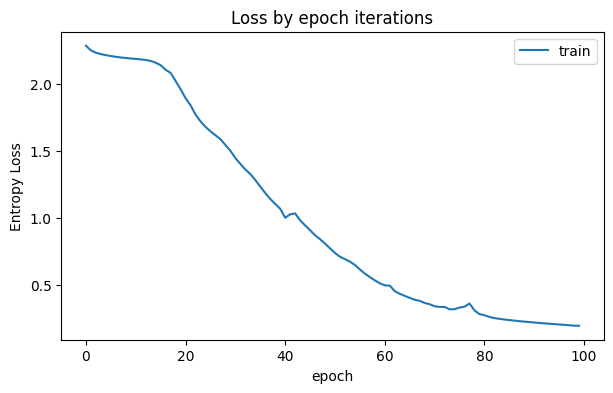

In [ ]:

history_loss = train(X1, Y1)
common_history ['dataset_1']['rnn'] = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('123')

'134'

##### LSTM

In [ ]:
rnnClass = nn.LSTM
embedding_size = len(X1[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 25)
  (hidden): LSTM(25, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 10)
t = embeddings(X1)
rnn = nn.LSTM(10,128, batch_first=True)
o, s = rnn(t)
o.shape, len(s), s[0].shape, s[1].shape

(torch.Size([1000, 25, 128]),
 2,
 torch.Size([1, 1000, 128]),
 torch.Size([1, 1000, 128]))

Epoch : 10/100.............'. Time: 0.441, Train loss: 2.178
Epoch : 20/100.............'. Time: 0.443, Train loss: 1.112
Epoch : 30/100.............'. Time: 0.435, Train loss: 0.471
Epoch : 40/100.............'. Time: 0.448, Train loss: 0.137
Epoch : 50/100.............'. Time: 0.451, Train loss: 0.043
Epoch : 60/100.............'. Time: 0.445, Train loss: 0.023
Epoch : 70/100.............'. Time: 0.676, Train loss: 0.015
Epoch : 80/100.............'. Time: 0.451, Train loss: 0.010
Epoch : 90/100.............'. Time: 0.435, Train loss: 0.008
Epoch : 100/100.............'. Time: 0.457, Train loss: 0.006


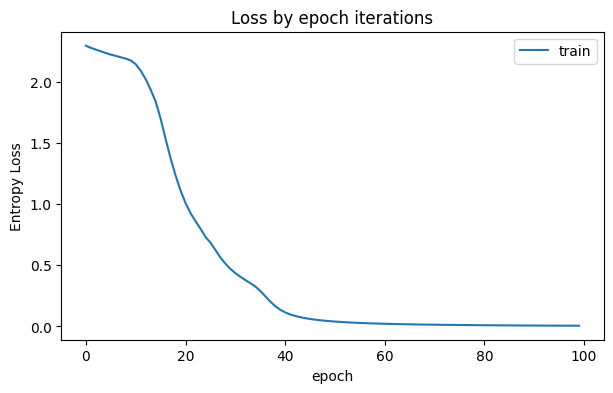

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
history_loss = train(X1, Y1)
common_history ['dataset_1']['lstm'] = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('123')

'134'

##### GRU

In [ ]:
rnnClass = nn.GRU
embedding_size = len(X1[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 25)
  (hidden): GRU(25, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 10)
t = embeddings(X1)
rnn = nn.GRU(10,128, batch_first=True)
o, s = rnn(t)
o.shape, len(s), s[0].shape

(torch.Size([1000, 25, 128]), 1, torch.Size([1000, 128]))

Epoch : 10/100.............'. Time: 0.372, Train loss: 2.186
Epoch : 20/100.............'. Time: 0.366, Train loss: 1.192
Epoch : 30/100.............'. Time: 0.375, Train loss: 0.176
Epoch : 40/100.............'. Time: 0.362, Train loss: 0.045
Epoch : 50/100.............'. Time: 0.376, Train loss: 0.022
Epoch : 60/100.............'. Time: 0.561, Train loss: 0.014
Epoch : 70/100.............'. Time: 0.364, Train loss: 0.009
Epoch : 80/100.............'. Time: 0.373, Train loss: 0.007
Epoch : 90/100.............'. Time: 0.583, Train loss: 0.005
Epoch : 100/100.............'. Time: 0.369, Train loss: 0.004


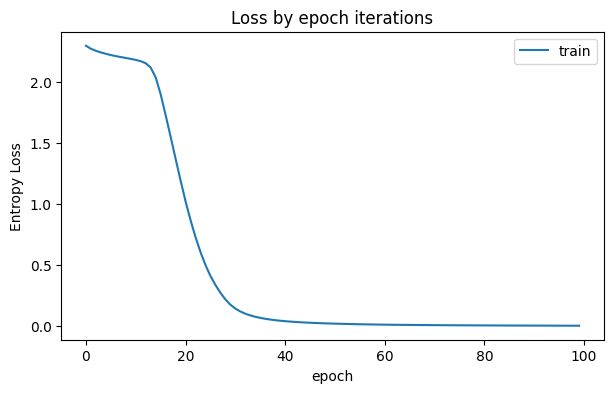

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
history_loss = train(X1, Y1)
common_history ['dataset_1']['gru']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('12356789')


'13467892'

#### dataset 2

##### RNN

In [ ]:
rnnClass = nn.RNN
embedding_size = len(X2[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 75)
  (hidden): RNN(75, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embeddings = torch.nn.Embedding(len(INDEX_TO_CHAR), 10)  # размер словаря * размер вектора для кодировки каждого слова
t = embeddings(X2)
rnn = torch.nn.RNN(10, 128, batch_first=True)
o, s = rnn(t)
o.shape, s.shape

(torch.Size([1000, 75, 128]), torch.Size([1, 1000, 128]))

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Epoch : 10/100.............'. Time: 0.172, Train loss: 2.172
Epoch : 20/100.............'. Time: 0.176, Train loss: 1.779
Epoch : 30/100.............'. Time: 0.187, Train loss: 1.488
Epoch : 40/100.............'. Time: 0.220, Train loss: 1.223
Epoch : 50/100.............'. Time: 0.258, Train loss: 1.147
Epoch : 60/100.............'. Time: 0.162, Train loss: 1.065
Epoch : 70/100.............'. Time: 0.176, Train loss: 0.738
Epoch : 80/100.............'. Time: 0.166, Train loss: 0.689
Epoch : 90/100.............'. Time: 0.267, Train loss: 0.698
Epoch : 100/100.............'. Time: 0.256, Train loss: 0.642


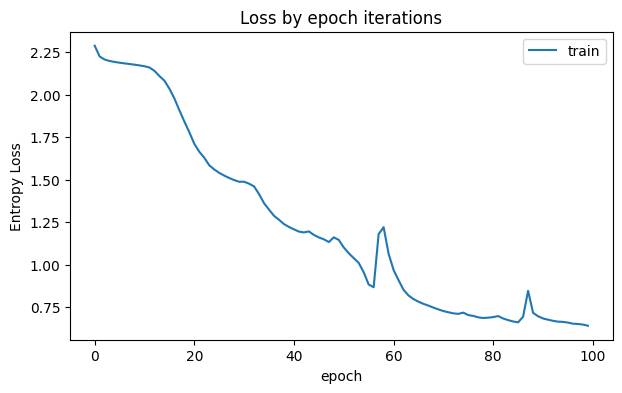

In [ ]:
history_loss = train(X2, Y2)
common_history ['dataset_2']['rnn']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('123456789')

'134567891'

##### LSTM

In [ ]:
rnnClass = nn.LSTM
embedding_size = len(X2[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 75)
  (hidden): LSTM(75, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 10)
t = embeddings(X2)
rnn = nn.LSTM(10,128, batch_first=True)
o, s = rnn(t)
o.shape, len(s), s[0].shape, s[1].shape

(torch.Size([1000, 75, 128]),
 2,
 torch.Size([1, 1000, 128]),
 torch.Size([1, 1000, 128]))

Epoch : 10/100.............'. Time: 0.510, Train loss: 2.090
Epoch : 20/100.............'. Time: 0.495, Train loss: 0.873
Epoch : 30/100.............'. Time: 0.491, Train loss: 0.120
Epoch : 40/100.............'. Time: 0.495, Train loss: 0.039
Epoch : 50/100.............'. Time: 0.771, Train loss: 0.020
Epoch : 60/100.............'. Time: 0.503, Train loss: 0.013
Epoch : 70/100.............'. Time: 0.504, Train loss: 0.009
Epoch : 80/100.............'. Time: 0.510, Train loss: 0.007
Epoch : 90/100.............'. Time: 0.514, Train loss: 0.005
Epoch : 100/100.............'. Time: 0.522, Train loss: 0.004


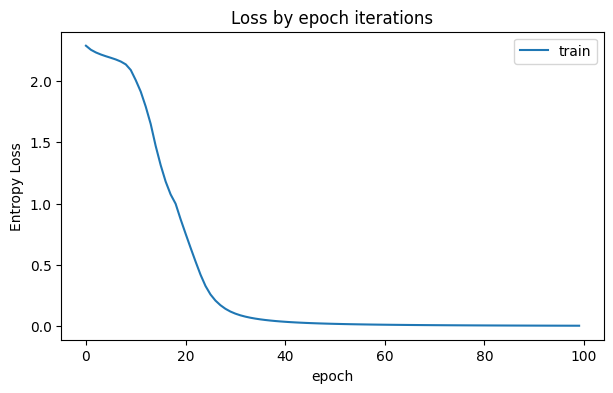

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
history_loss = train(X2, Y2)
common_history ['dataset_2']['lstm']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('1234567893')

'1345678994'

##### GRU

In [ ]:
rnnClass = nn.GRU
embedding_size = len(X2[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 75)
  (hidden): GRU(75, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 10)
t = embeddings(X2)
rnn = nn.GRU(10,128, batch_first=True)
o, s = rnn(t)
o.shape, len(s), s[0].shape

(torch.Size([1000, 75, 128]), 1, torch.Size([1000, 128]))

Epoch : 10/100.............'. Time: 0.429, Train loss: 2.145
Epoch : 20/100.............'. Time: 0.675, Train loss: 0.854
Epoch : 30/100.............'. Time: 0.463, Train loss: 0.109
Epoch : 40/100.............'. Time: 0.438, Train loss: 0.036
Epoch : 50/100.............'. Time: 0.443, Train loss: 0.019
Epoch : 60/100.............'. Time: 0.442, Train loss: 0.012
Epoch : 70/100.............'. Time: 0.435, Train loss: 0.009
Epoch : 80/100.............'. Time: 0.449, Train loss: 0.006
Epoch : 90/100.............'. Time: 0.450, Train loss: 0.005
Epoch : 100/100.............'. Time: 0.682, Train loss: 0.004


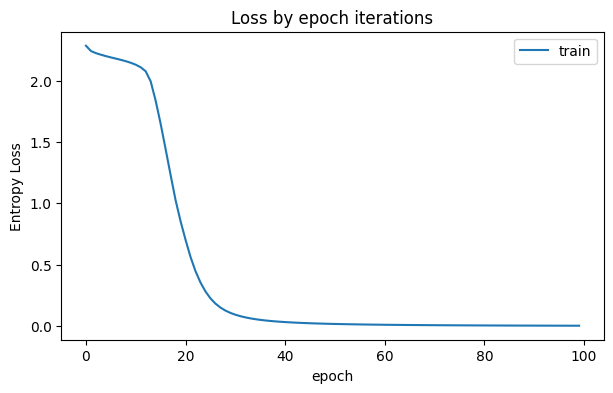

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
history_loss = train(X2, Y2)
common_history ['dataset_2']['gru']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('123567892')


'134678993'

#### dataset 3

##### RNN

In [ ]:
rnnClass = nn.RNN
embedding_size = len(X3[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 150)
  (hidden): RNN(150, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embeddings = torch.nn.Embedding(len(INDEX_TO_CHAR), 10)  # размер словаря * размер вектора для кодировки каждого слова
t = embeddings(X3)
rnn = torch.nn.RNN(10, 128, batch_first=True)
o, s = rnn(t)
o.shape, s.shape

(torch.Size([1000, 150, 128]), torch.Size([1, 1000, 128]))

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

Epoch : 10/100.............'. Time: 0.201, Train loss: 2.154
Epoch : 20/100.............'. Time: 0.197, Train loss: 1.773
Epoch : 30/100.............'. Time: 0.194, Train loss: 1.603
Epoch : 40/100.............'. Time: 0.195, Train loss: 1.560
Epoch : 50/100.............'. Time: 0.205, Train loss: 1.500
Epoch : 60/100.............'. Time: 0.259, Train loss: 1.157
Epoch : 70/100.............'. Time: 0.198, Train loss: 0.946
Epoch : 80/100.............'. Time: 0.197, Train loss: 0.762
Epoch : 90/100.............'. Time: 0.197, Train loss: 0.982
Epoch : 100/100.............'. Time: 0.197, Train loss: 0.468


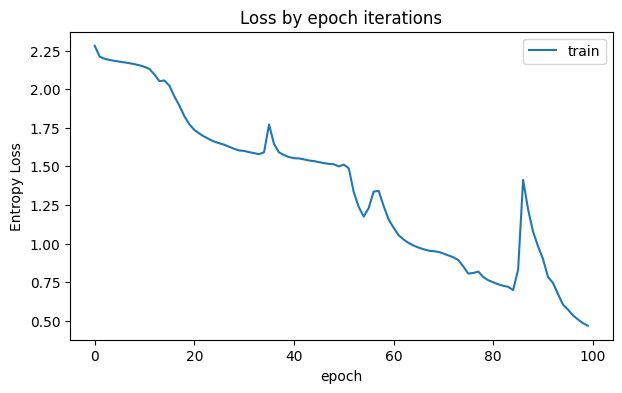

In [ ]:
history_loss = train(X3, Y3)
common_history ['dataset_3']['rnn']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('123456789')

'134567897'

##### LSTM

In [ ]:
rnnClass = nn.LSTM
embedding_size = len(X3[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 150)
  (hidden): LSTM(150, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 10)
t = embeddings(X3)
rnn = nn.LSTM(10,128, batch_first=True)
o, s = rnn(t)
o.shape, len(s), s[0].shape, s[1].shape

(torch.Size([1000, 150, 128]),
 2,
 torch.Size([1, 1000, 128]),
 torch.Size([1, 1000, 128]))

Epoch : 10/100.............'. Time: 0.621, Train loss: 1.960
Epoch : 20/100.............'. Time: 0.802, Train loss: 0.290
Epoch : 30/100.............'. Time: 0.626, Train loss: 0.049
Epoch : 40/100.............'. Time: 0.961, Train loss: 0.022
Epoch : 50/100.............'. Time: 0.603, Train loss: 0.013
Epoch : 60/100.............'. Time: 0.955, Train loss: 0.009
Epoch : 70/100.............'. Time: 0.611, Train loss: 0.006
Epoch : 80/100.............'. Time: 0.962, Train loss: 0.005
Epoch : 90/100.............'. Time: 0.601, Train loss: 0.004
Epoch : 100/100.............'. Time: 0.948, Train loss: 0.003


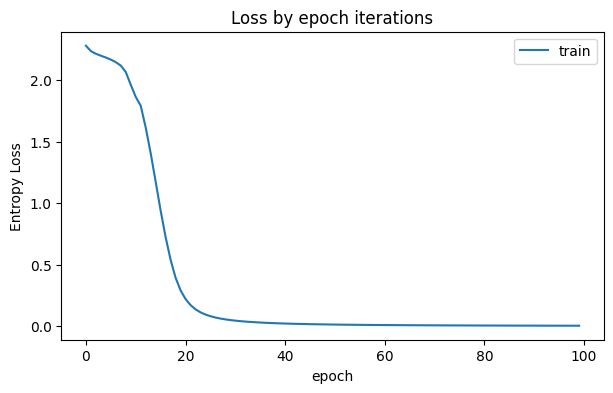

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
history_loss = train(X3, Y3)
common_history ['dataset_3']['lstm']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('123456789')

'134567892'

##### GRU

In [ ]:
rnnClass = nn.GRU
embedding_size = len(X3[0])
dictionary_size = len(INDEX_TO_CHAR)
num_hiddens = 128
num_classes = len(INDEX_TO_CHAR)
model = Network(rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes)
model

Network(
  (embedding): Embedding(10, 150)
  (hidden): GRU(150, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 10)
t = embeddings(X1)
rnn = nn.GRU(10,128, batch_first=True)
o, s = rnn(t)
o.shape, len(s), s[0].shape

(torch.Size([1000, 25, 128]), 1, torch.Size([1000, 128]))

Epoch : 10/100.............'. Time: 0.538, Train loss: 2.109
Epoch : 20/100.............'. Time: 0.803, Train loss: 0.690
Epoch : 30/100.............'. Time: 0.760, Train loss: 0.104
Epoch : 40/100.............'. Time: 0.808, Train loss: 0.038
Epoch : 50/100.............'. Time: 0.799, Train loss: 0.021
Epoch : 60/100.............'. Time: 0.750, Train loss: 0.013
Epoch : 70/100.............'. Time: 0.524, Train loss: 0.010
Epoch : 80/100.............'. Time: 0.529, Train loss: 0.007
Epoch : 90/100.............'. Time: 0.525, Train loss: 0.006
Epoch : 100/100.............'. Time: 0.534, Train loss: 0.005


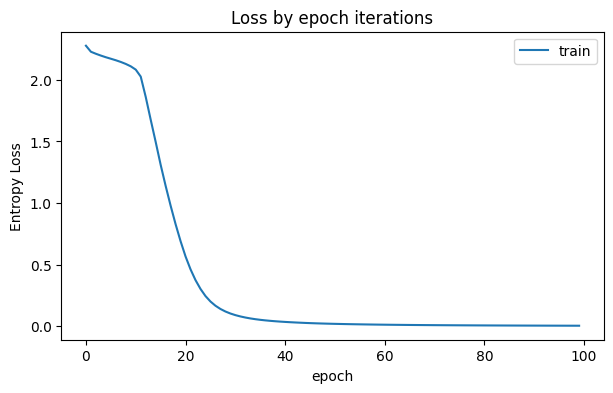

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
history_loss = train(X3, Y3)
common_history ['dataset_3']['gru']  = round(min(history_loss), 4)
loss_plt(history_loss)

In [ ]:
generate_decryption_sentence('1234567890')


'7901234597'

#### Результат

In [ ]:
common_history

{'dataset_1': {'rnn': 0.1963, 'lstm': 0.006, 'gru': 0.0043},
 'dataset_2': {'rnn': 0.642, 'lstm': 0.0042, 'gru': 0.0041},
 'dataset_3': {'rnn': 0.468, 'lstm': 0.0032, 'gru': 0.0047}}

In [ ]:
compare_result = pd.DataFrame.from_dict(common_history)
compare_result

,dataset_1,dataset_2,dataset_3
rnn,0.1963,0.6420,0.4680
lstm,0.0060,0.0042,0.0032
gru,0.0043,0.0041,0.0047


Вывод:

для данной задачи RNN выдает довольно плохие результаты.


Самый лучший результат на третьем датасете из последовательностей по 150 символов при использовании LSTM.

Все модели отрабатывают плохо ситуацию, когда сумма больше 10.

## Задание 2

### загрузка и подготовка данных

In [ ]:
!wget https://s3.amazonaws.com/text-datasets/nietzsche.txt

--2023-08-27 19:10:39--  https://s3.amazonaws.com/text-datasets/nietzsche.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.138.232, 52.216.145.189, 52.217.77.94, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.138.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 600901 (587K) [text/plain]
Saving to: ‘nietzsche.txt’

nietzsche.txt       100%[===================>] 586.82K   536KB/s    in 1.1s    

2023-08-27 19:10:41 (536 KB/s) - ‘nietzsche.txt’ saved [600901/600901]



In [ ]:
with open('nietzsche.txt', encoding='utf-8') as f:
    text = f.read().lower()
print('length:', len(text))
text = re.sub('[^a-z ]', ' ', text)
text = re.sub('\s+', ' ', text)

length: 600893


In [ ]:
INDEX_TO_CHAR = sorted(list(set(text)))
CHAR_TO_INDEX = {c: i for i, c in enumerate(INDEX_TO_CHAR)}

In [ ]:
MAX_LEN = 40
STEP = 3
SENTENCES = []
NEXT_CHARS = []
for i in range(0, len(text) - MAX_LEN, STEP):
    SENTENCES.append(text[i: i + MAX_LEN])
    NEXT_CHARS.append(text[i + MAX_LEN])
print('Num sents:', len(SENTENCES))

Num sents: 193075


In [ ]:
print('Vectorization...')
X = torch.zeros((len(SENTENCES), MAX_LEN), dtype=int)
Y = torch.zeros((len(SENTENCES)), dtype=int)
for i, sentence in enumerate(SENTENCES):
    for t, char in enumerate(sentence):
        X[i, t] = CHAR_TO_INDEX[char]
    Y[i] = CHAR_TO_INDEX[NEXT_CHARS[i]]

Vectorization...


In [ ]:
BATCH_SIZE=512
dataset = torch.utils.data.TensorDataset(X, Y)
data = torch.utils.data.DataLoader(dataset, BATCH_SIZE, shuffle=True)


### нейронная сеть и обучение

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, rnnClass, dictionary_size, embedding_size, num_hiddens, num_classes):
        super().__init__()

        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(dictionary_size, embedding_size)
        self.hidden = rnnClass(embedding_size, num_hiddens, batch_first=True)
        self.output = nn.Linear(num_hiddens, num_classes)

    def forward(self, X):
        out = self.embedding(X)
        _, state = self.hidden(out)
        predictions = self.output(state[0].squeeze())
        return predictions

In [ ]:
model = NeuralNetwork(nn.LSTM, len(CHAR_TO_INDEX), 64, 128, len(CHAR_TO_INDEX))
model

NeuralNetwork(
  (embedding): Embedding(27, 64)
  (hidden): LSTM(64, 128, batch_first=True)
  (output): Linear(in_features=128, out_features=27, bias=True)
)

In [ ]:
embedding = nn.Embedding(len(INDEX_TO_CHAR), 15)
rnn = nn.LSTM(15,128, batch_first=True)

In [ ]:
o, s = rnn(embedding(X[0:10]))
o.shape, len(s), s[0].shape, s[1].shape

(torch.Size([10, 40, 128]),
 2,
 torch.Size([1, 10, 128]),
 torch.Size([1, 10, 128]))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
model = model.to(device)


In [ ]:
def sample(preds):
    softmaxed = torch.softmax(preds, 0)
    probas = torch.distributions.multinomial.Multinomial(1, softmaxed).sample()
    return probas.argmax()

def generate_text():
    start_index = random.randint(0, len(text) - MAX_LEN - 1)

    generated = ''
    sentence = text[start_index: start_index + MAX_LEN]
    generated += sentence

    for i in range(MAX_LEN):
        x_pred = torch.zeros((1, MAX_LEN), dtype=int)
        for t, char in enumerate(generated[-MAX_LEN:]):
            x_pred[0, t] = CHAR_TO_INDEX[char]

        preds = model(x_pred.to(device))
        next_char = INDEX_TO_CHAR[sample(preds)]
        generated = generated + next_char

    print(generated[:MAX_LEN] + '|' + generated[MAX_LEN:])

In [ ]:
generate_text()

sent day excites distrust and displeasur|cqxcobtvxbtxyphyumsazgapcwytqq jpokfaemq


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
for ep in range(100):
    start = time.time()
    train_loss = 0.
    train_passed = 0

    model.train()
    for X_b, y_b in data:
        X_b, y_b = X_b.to(device), y_b.to(device)
        optimizer.zero_grad()
        answers = model(X_b)
        loss = criterion(answers, y_b)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
        train_passed += 1

    print("Epoch {}. Time: {:.3f}, Train loss: {:.3f}".format(ep, time.time() - start, train_loss / train_passed))
    model.eval()
    generate_text()

Epoch 0. Time: 4.910, Train loss: 2.180
oa in the midst of hellenic culture with| and mangers the souophis of of the nods
Epoch 1. Time: 4.701, Train loss: 1.792
 which is certainly neither categorical |theer to veary to and enjigan in expente
Epoch 2. Time: 4.450, Train loss: 1.657
r specialties to our hospitality for ins|mans whaken surdelys the filing frequent
Epoch 3. Time: 4.396, Train loss: 1.573
e as they are and have always been the g|reas themses we hangrenests nom these it
Epoch 4. Time: 4.849, Train loss: 1.515
being be not involved is there such a th|oubled comemach demary indures be reaxer
Epoch 5. Time: 4.398, Train loss: 1.470
in ajax whose suicide would not have see|n animent eurmplents the millary engour 
Epoch 6. Time: 4.434, Train loss: 1.433
n would have remained an animal thus has| not destren the simle clasire to sycult
Epoch 7. Time: 4.802, Train loss: 1.402
l one might say arbitrary will is now ne|w senctud by frich we phaseous and ideal
Epoch 8. Time: 4.426, Tr